<a href="https://colab.research.google.com/github/joyinning/causal_inference/blob/main/Causal_Week_8_2_(A).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Resource: https://matheusfacure.github.io/python-causality-handbook/22-Debiased-Orthogonal-Machine-Learning.html#

# Chapter 22

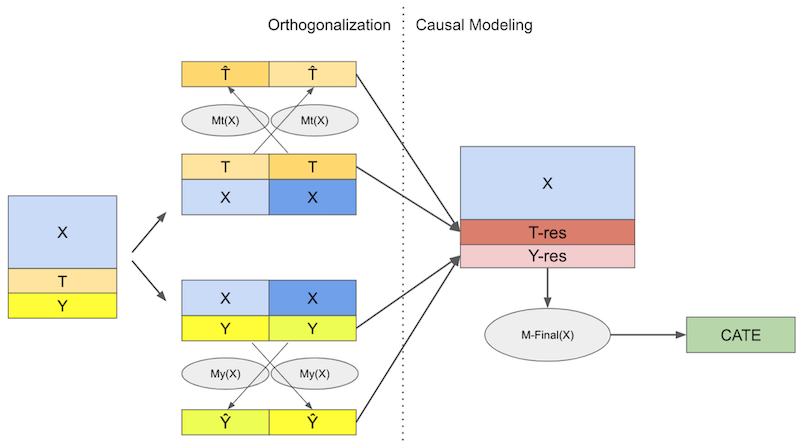

## Concepts

**Question 1 What makes Debiased/Orthogonal Machine Learning (DML) stand out among other meta-learner approaches in causal inference, and why is it considered a more rigorous and general framework compared to others like the T-learner, S-learner, and X-learner?**

DML stands out because it offers a more precise and flexible way to estimate causal effects compared to other methods.
1. Applicabiliy: it can be used with both continuous and discrete treatments, making it versatile for different types of studies.
2. Rigorous Support: it is built on strong theoretical foundations that ensure its estimates are reliable and well-supported by statistical analysis.
3. Bias Reduction: by separating the influence of other variables from the treatment effect, it provides more accurate and unbiased results.
4. General Framework: it serves as a tool that can be applied in various scenarios.

### ML for Nuisance Parameters
When we are estimating the treatment effect of prices on sales, accounting for confounders such as temperature, weekdays, and costs, relationship between sales and other variables (e.g., temperature) might not be linear, complicating the modeling.
- Solution: Use linear regression with Frisch-Waugh-Lovell theorem or advanced methods like Double/Debiased Machine Learning (ML) to handle high dimensionality and non-linear relationships.

**Question 1 What is the purpose of controlling for nuisance parameters in regression?**

To ensure the estimation of the primary parameter of interest, like the treatment effect, is not biased by other variables.

**Question 2 How does the FWL theorem help in regression analysis and what is the advantage of using ML in the FWL framework?**

- It allows for the estimation of a parameter of interest independently from other covariates by using residuals, thereby reducing potential biases.
- ML can model complex and non-linear relationships more effectively than traditional linear models, potentially leading to more accurate estimates.

**Question 3 What does Double/Debiased ML estimate and how is overfitting addressed in Double/Debiased ML, which is the potential problem with using ML models in causal inference?**

- It estimates the ATE and can also be adapted to estimate treatment effects that vary with covariates (CATE).
- By using cross-validation to generate out-of-sample predictions and residuals, ensuring that the model generalizes well beyond the training data.

### Non-Parametric Double/Debiased Machine Learning
This techniques extend the framework of causal inference beyond traditional parametric models.

**Question 4 What does non-parametric Double/Debiased ML allow that traditional linear models do not?**

It allows for the estimation of causal effects using complex, potentially non-linear machine learning models.

**Question 5 What is Residualization and Causal Loss Function? What is the R-Learner's role in non-parametric Double/Debiased ML?**

- Residualization: The process starts similar to traditional approaches but focuses on the residuals (errors) from initial ML models predicting treatment and outcome.
- Causal Loss Function: A reformulated loss function that isolates the causal parameter by focusing on these residuals, allowing the estimation of CATE trough non-linear relationships.
- The R-Learner focuses on minimizing a reformulated causal loss function based on residuals, allowing the estimation of CATE in potentially non-linear forms.

**Question 6 Can non-parametric Double/Debiased ML accurately predict non-linear treatment effects? What caution must be taken when using non-parametric models for predicting treatment effects at new levels?**

- It estimates locally linear approximations of non-linear CATE but may struggle with accurate predictions for large deviations from observed treatment levels.
- It is crucial to avoid extrapolating findings to significantly different treatment levels without additional evidence, as the model estimates are locally linear and may not accurately reflect global treatment effects.

### Non-scientific Double/Debiased ML Approach

This method diverges from traditional approaches by focusing on simulating various treatment levels and predicting outcomes for each, rather than merely estimating the treatment effect.

**Question 7 What is the primary objective of using Non-Scientific Double/Debiased ML in causal inference? How does the Non-Scientific Double/Debiased ML handle the prediction of treatment effects?**

- The primary objective is to shift from estimating linear approximations of CATE to making counterfactual predictions, allowing for the simulation of various treatment levels and predicting outcomes based on the simulations.
- It uses machine learning models to predict the residualized outcome from the residualized treatment and other covariates, moving beyond linear approximations to model potentially non-linear and complex relationships.

**Question 8 What are the steps involved in making counterfactual predictions in this approach?**

1. Residualizing the treatment and outcome.
2. Fitting a machine learning model to the residuals alongside other covariates.
3. Cross-joining test data with a range of simulated prices.
4. Using the model to predict outcomes for these varied treatment levels.

**Question 9 What are the potential risks and downsides of the Non-Scientific Double/Debiased ML methods?**


Risks include the lack of scientific validation, potential biased from model regularization, issues with model choice affecting smoothness and continuty of predictions, and challenges with extrapolating beyond observed data.

## Case Study

**Dataset**

In [1]:
import pandas as pd
import numpy as np

np.random.seed(42)

num_samples = 10000
campaign_range = (0, 3000)

base_data = {
    'age': np.random.randint(18, 70, num_samples),
    'gender': np.random.randint(0, 2, num_samples),
    'income': np.random.randint(30000, 150000, num_samples),
    'campaign': np.random.uniform(*campaign_range, num_samples),
    'purchase_amount': np.random.normal(300, 100, num_samples)
}

# Non-random treatment dataset
data = base_data.copy()
data['campaign'] = np.where(data['age'] < 45,
                            np.random.uniform(1500, 3000, num_samples),
                            np.random.uniform(0, 1500, num_samples))
data['campaign'] += np.where(data['income'] > 100000,
                             np.random.uniform(500, 1500, num_samples),
                             0)
data['purchase_amount'] += (
    data['income'] * 0.001 +
    data['campaign'] * 0.2 +
    np.sqrt(data['campaign']) * 0.05 +
    (data['income'] / 1000) * np.log(data['campaign'] + 1) * 0.03
)

df = pd.DataFrame(data)

# Random treatment dataset
data2 = base_data.copy()
data2['purchase_amount'] += (
    data2['income'] * 0.001 +
    data2['campaign'] * 0.2 +
    np.sqrt(data2['campaign']) * 0.1 +
    (data2['income'] / 100000) * np.log(data2['campaign'] + 1) * 0.05
)

# Convert data2 to DataFrame
df2 = pd.DataFrame(data2)


# Create DataFrame
df = pd.DataFrame(data)
df2 = pd.DataFrame(data2)


1. age: Customer age.
2. gender: Customer gender (0 for male, 1 for female).
3. income: Monthly income of the customer.
4. campaign: the amount spent on a marketing campaign.
5. purchase_amount: Amount of money spent by the customer during the campaign.

In [2]:
df.head()

,age,gender,income,campaign,purchase_amount
0,56,0,139952,2249.196416,1718.961406
1,69,1,84235,637.885610,1163.869346
2,46,1,88565,1138.237789,785.198901
3,32,1,85342,2739.710487,1375.207819
4,60,0,72723,979.189709,1099.395769


In [3]:
df2.head()

,age,gender,income,campaign,purchase_amount
0,56,0,139952,2146.431386,1718.961406
1,69,1,84235,2709.624975,1163.869346
2,46,1,88565,501.591388,785.198901
3,32,1,85342,1429.445486,1375.207819
4,60,0,72723,1860.328596,1099.395769


In [4]:
test = df2
train = df

### Explore the impact of marketing campaign expenditure on customer purchase amounts while controlling for demographic variables such as age, gender, income. Predict how changes in the amount spent on marketing influence customer behavior, using a data-driven approach that takes into account individual differences and confounding factors.

### 1. Identifying Dataset Bias Before Exercise

**Visualize potnetial biases in the dataset by plotting sample scatterplots with different hues.**

The treatment or key variable of interest (campaign) is not randomly assigned but is instead systematically varied along with other confounding variables (age, income).

<Axes: xlabel='campaign', ylabel='purchase_amount'>

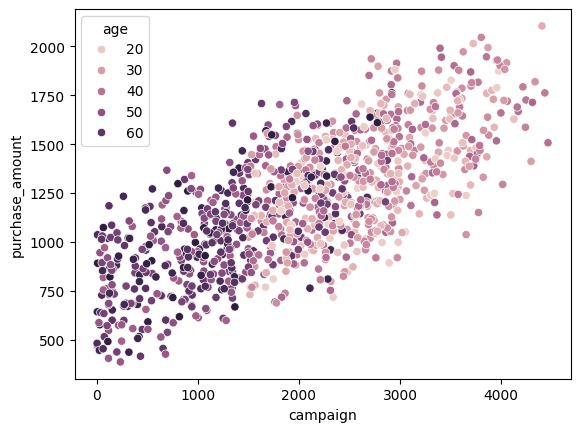

In [5]:
from matplotlib import pyplot as plt
import seaborn as sns

np.random.seed(123)
sns.scatterplot(data=train.sample(1000), x="campaign", y="purchase_amount", hue="age")

<Axes: xlabel='campaign', ylabel='purchase_amount'>

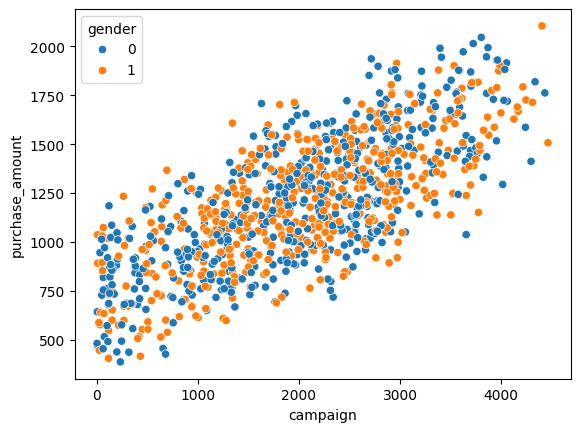

In [6]:
np.random.seed(123)
sns.scatterplot(data=train.sample(1000), x="campaign", y="purchase_amount", hue="gender")

<Axes: xlabel='campaign', ylabel='purchase_amount'>

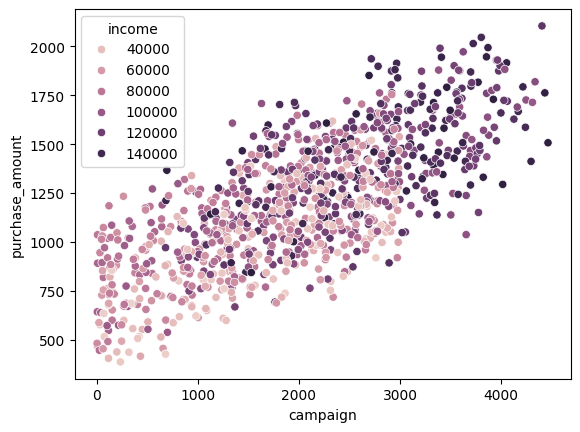

In [7]:
np.random.seed(123)
sns.scatterplot(data=train.sample(1000), x="campaign", y="purchase_amount", hue="income")

### Nuisance Parameter Estimation and CATE with Double-ML


**Estimate the treatment effect by first estimating the effects of the covarites on the outcome and treatment.**

In [8]:
import statsmodels.formula.api as smf
my = smf.ols("purchase_amount~age+C(gender)+income", data=train).fit()
mt = smf.ols("campaign~age+C(gender)+income", data=train).fit()

**Estimate the ATE with the residuals**

In [9]:
smf.ols("amount_res~campaign_res",
        data=train.assign(amount_res=my.resid,
                          campaign_res=mt.resid)
       ).fit().summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-4.963e-10,2.024,-2.45e-10,1.000,-3.967,3.967
campaign_res,0.2034,0.003,65.657,0.000,0.197,0.209


The ATE is 0.2, indicating that each unit increase in the marketing campaign will raise purchase amounts by 2 units.

**Estimate the ATE including the treatment and the covariates in the same model**

In [10]:
smf.ols("purchase_amount~campaign+age+C(gender)+income", data=train).fit().params["campaign"]

0.20337115477182915

Estimating the treatment effect all at once or separating in the FWL steps is mathematically the same.

**Estimate the niusance relationship using ML models**

**[mt] = campaign~age+C(gender)+income**

In [11]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_predict

y = "purchase_amount"
T = "campaign"
X = ["age", "gender", "income"]

In [12]:
debias_m = LGBMRegressor(max_depth=3)

train_pred = train.assign(campaign_res =  train[T] - cross_val_predict(debias_m, train[X], train[T], cv=5) + train[T].mean()) # add mu_t for visualization.

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000674 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 310
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 3
[LightGBM] [Info] Start training from score 1964.741579
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

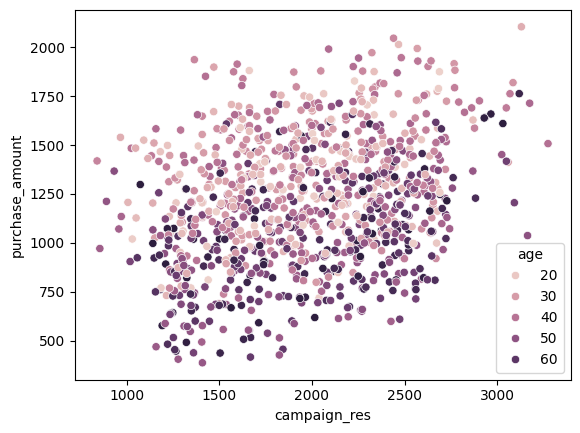

In [13]:
np.random.seed(123)
sns.scatterplot(data=train_pred.sample(1000), x="campaign_res", y="purchase_amount", hue="age");

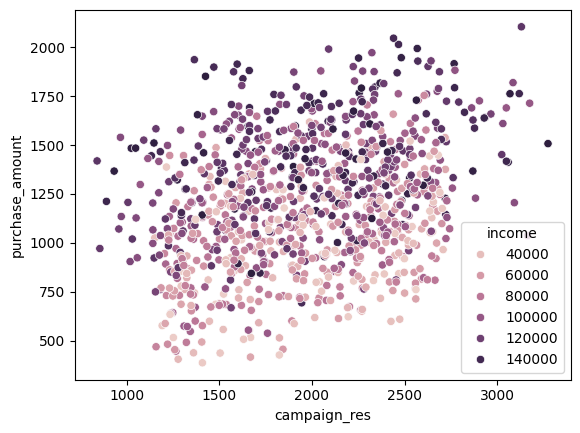

In [14]:
np.random.seed(123)
sns.scatterplot(data=train_pred.sample(1000), x="campaign_res", y="purchase_amount", hue="income");

The role of mt is to debias the treatment.

**[my] = purchase_amount~age+C(gender)+income**

In [15]:
denoise_m = LGBMRegressor(max_depth=3)

train_pred = train_pred.assign(amount_res =  train[y] - cross_val_predict(denoise_m, train[X], train[y], cv=5) + train[y].mean())

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000540 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 310
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 3
[LightGBM] [Info] Start training from score 1199.922398
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

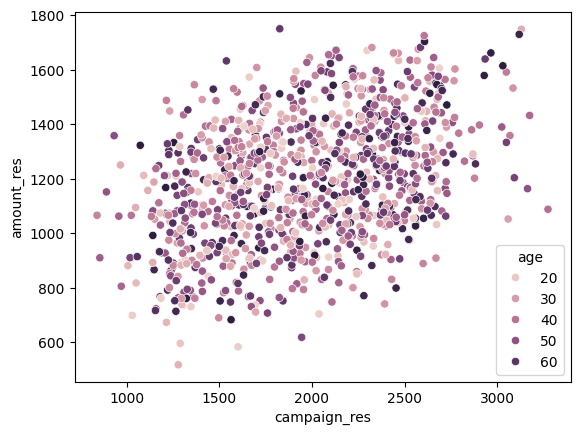

In [16]:
np.random.seed(123)
sns.scatterplot(data=train_pred.sample(1000), x="campaign_res", y="amount_res", hue="age");

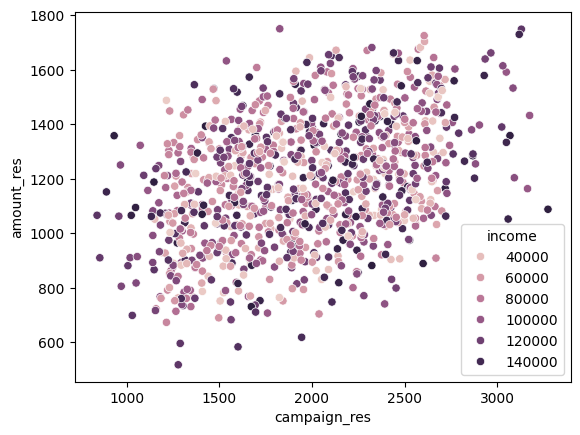

In [17]:
np.random.seed(123)
sns.scatterplot(data=train_pred.sample(1000), x="campaign_res", y="amount_res", hue="income");

We can see the role of my is to remove the variance from Y.

**Compare the causal relationship by running regressions on both residualized and un-residualized data, and then calculate the CATE for the test set**

In [18]:
final_model = smf.ols(formula='amount_res ~ campaign_res', data=train_pred).fit()
final_model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,805.4585,8.617,93.478,0.000,788.568,822.349
campaign_res,0.2002,0.004,46.730,0.000,0.192,0.209


In [19]:
final_model = smf.ols(formula='purchase_amount ~ campaign', data=train_pred).fit()
final_model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,741.7250,4.664,159.026,0.000,732.582,750.868
campaign,0.2328,0.002,109.809,0.000,0.229,0.237


The coefficients from both models are positive and statistically significant, indicating a positive effect of the campaign on purchase amounts. The difference in coefficients between the two models might be due to the adjustment for confounding variables in the residualized model, which can lead to a more accurate estimation of the causal effect.

**Calculate CATE on Test Set**

In [20]:
final_model_cate = smf.ols(formula='amount_res ~ campaign_res * (age + C(gender) + income)', data=train_pred).fit()
test['campaign_res'] = test[T] - cross_val_predict(debias_m, test[X], test[T], cv=5) + train[T].mean()
cate_test = test.assign(
    cate=final_model_cate.predict(test.assign(campaign_res=1)) - final_model_cate.predict(test.assign(campaign_res=0))
)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002571 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 310
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 3
[LightGBM] [Info] Start training from score 1503.988844
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

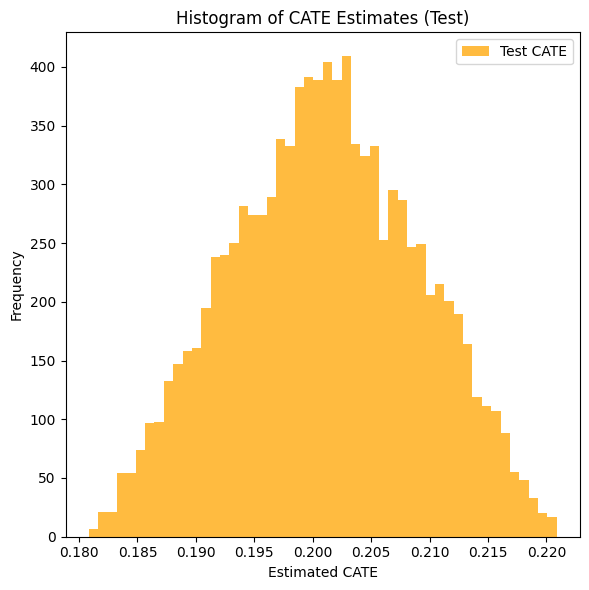

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.hist(cate_test['cate'], bins=50, alpha=0.75, label='Test CATE', color='orange')
plt.xlabel('Estimated CATE')
plt.ylabel('Frequency')
plt.title('Histogram of CATE Estimates (Test)')
plt.legend()

plt.tight_layout()
plt.show()

1. The treatment effect is relatively consistent across different observations or subgroups within the dataset. (The treatment has a uniform impact, regardless of the varying characteristics of the individuals or units.)
2. While the treatment has a positive effect, the magnitude of this effect is modest, because there is a small interval near 0.2.

In [22]:
cate_test

,age,gender,income,campaign,purchase_amount,campaign_res,cate
0,56,0,139952,2146.431386,1718.961406,2571.954972,0.197092
1,69,1,84235,2709.624975,1163.869346,3157.313469,0.212731
2,46,1,88565,501.591388,785.198901,907.460399,0.203110
3,32,1,85342,1429.445486,1375.207819,1930.110243,0.198177
4,60,0,72723,1860.328596,1099.395769,2311.828528,0.209251
...,...,...,...,...,...,...,...
9995,55,0,119041,530.926890,1125.320002,1021.092260,0.200002
9996,51,1,62771,1913.502611,770.775131,2360.073179,0.209122
9997,57,1,94950,2360.988356,1365.717111,2837.220636,0.206378
9998,64,0,70245,2259.702497,1234.760140,2777.457907,0.211197


In [23]:
def plot_cumulative_gain(data, label):
    sorted_data = data.sort_values('cate', ascending=False)
    cum_outcomes = np.cumsum(sorted_data['purchase_amount'])
    total_outcomes = cum_outcomes.iloc[-1]
    cumulative_gain = cum_outcomes / total_outcomes
    percentage_of_data = np.linspace(0, 1, len(cumulative_gain))

    return percentage_of_data, cumulative_gain


In [24]:
x_test, gain_test = plot_cumulative_gain(cate_test, 'Test CATE')

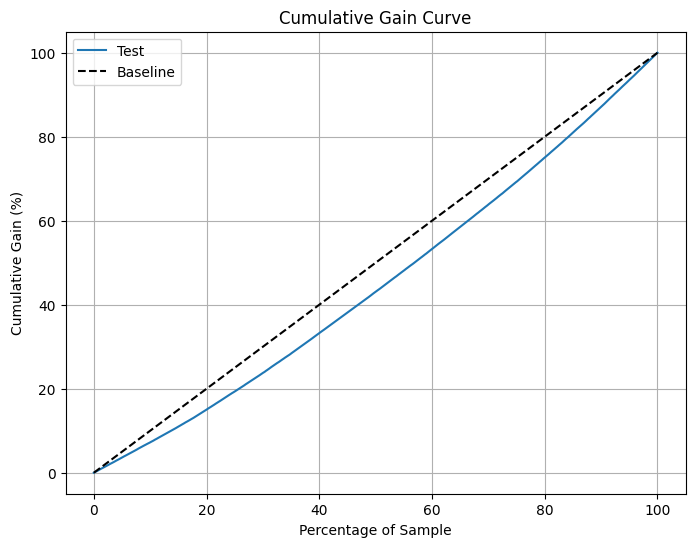

In [25]:
plt.figure(figsize=(8, 6))
plt.plot(x_test * 100, gain_test * 100, label='Test', color='C0')

plt.plot([0, 100], [0, 100], 'k--', label='Baseline')

plt.xlabel('Percentage of Sample')
plt.ylabel('Cumulative Gain (%)')
plt.title('Cumulative Gain Curve')
plt.legend()
plt.grid(True)
plt.show()

- The curve being close to the baseline suggests that the treatment does not significantly alter the outcomes compared to a random allocation of treatment.

### Non-Parametric Double/Debiased ML Implementation

In [26]:
train_pred = train.assign(campaign_res =  train[T] - cross_val_predict(debias_m, train[X], train[T], cv=5),
                          amount_res =  train[y] - cross_val_predict(denoise_m, train[X], train[y], cv=5))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000553 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 310
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 3
[LightGBM] [Info] Start training from score 1964.741579
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

**Implement a non-parametric Double/Debiased ML model to predict the causal effect of the treatment on the outcome using machine learning models**

In [27]:
model_final = LGBMRegressor(max_depth=3)

# create the weights
w = train_pred["campaign_res"] ** 2

# create the transformed target
y_star = (train_pred["amount_res"] / train_pred["campaign_res"])

# use a weighted regression ML model to predict the target with the weights.
model_final.fit(X=train[X], y=y_star, sample_weight=w);

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000209 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 310
[LightGBM] [Info] Number of data points in the train set: 10000, number of used features: 3
[LightGBM] [Info] Start training from score 0.200203
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

In [28]:
cate_test_non_param = test.assign(cate=model_final.predict(test[X]))

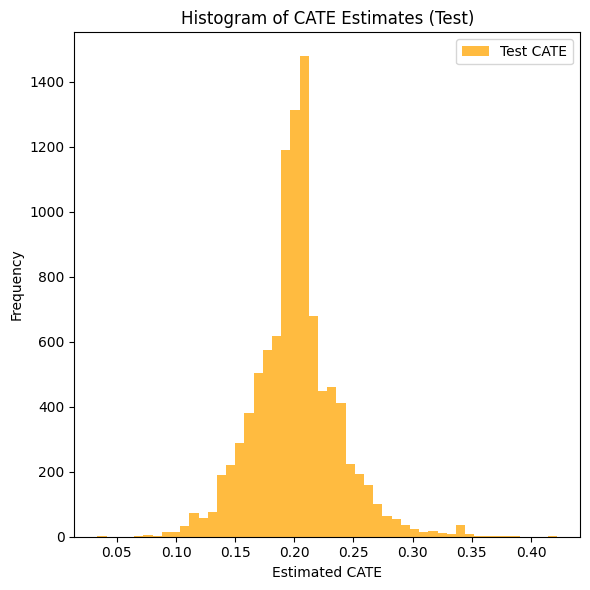

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.hist(cate_test_non_param['cate'], bins=50, alpha=0.75, label='Test CATE', color='orange')
plt.xlabel('Estimated CATE')
plt.ylabel('Frequency')
plt.title('Histogram of CATE Estimates (Test)')
plt.legend()

plt.tight_layout()
plt.show()

1. Increased Sensitivity: the non-parametric double/debiased model may be more sensitive to variations in the data, and it indicates that the model is possibly better at detecting how different types of individuals respond to the treatment, ranging from very low to quite high treatment effects.
2. Improved Estimation Accuracy: It can lead to a more accurate estimation of the treatment effects, reflected in the broader range of CATEs. (Non-parametric and debiased methods are designed to reduce bias in causal inference models, particularly by accounting for confounding variables more effectively.)

In [30]:
x_test, gain_test = plot_cumulative_gain(cate_test_non_param, 'Test CATE')

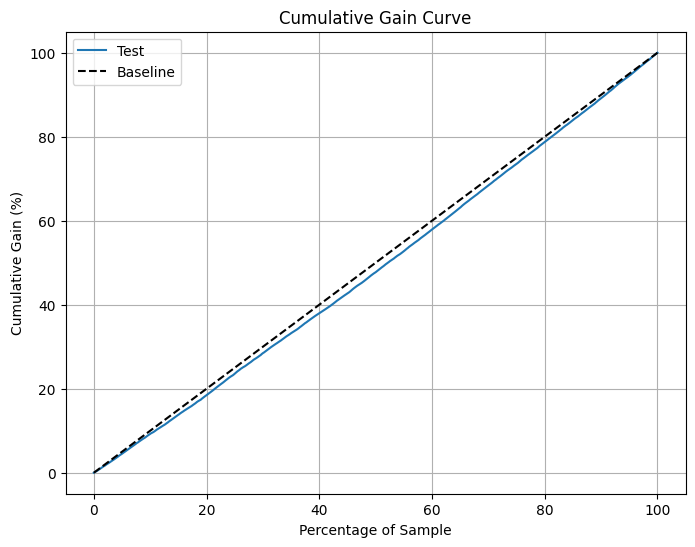

In [31]:
plt.figure(figsize=(8, 6))
plt.plot(x_test * 100, gain_test * 100, label='Test', color='C0')

plt.plot([0, 100], [0, 100], 'k--', label='Baseline')

plt.xlabel('Percentage of Sample')
plt.ylabel('Cumulative Gain (%)')
plt.title('Cumulative Gain Curve')
plt.legend()
plt.grid(True)
plt.show()

1. Less Distinctive Impact: When the cumulative gain curve lies closer to the baseline, it implies that the model's predictions do not differentiate as effectively between individuals in terms of how much they benefit from the treatment.
2. Overfitting in Previous Models: The new model, being closer to the baseline, might be providing a more honest or conservative assessment of the treatment's impact across the population.

**Implement a non-parametric model to explore non-linear effects of sponsorship on purchase amount**

Guess there are sponsorship costs.

In [32]:
np.random.seed(321)
n=5000
sponsorship = np.random.gamma(2,10, n).reshape(-1,1)
sponsorship.sort(axis=0)
purchase_amount = np.random.normal(20+10*np.sqrt(sponsorship), 1)

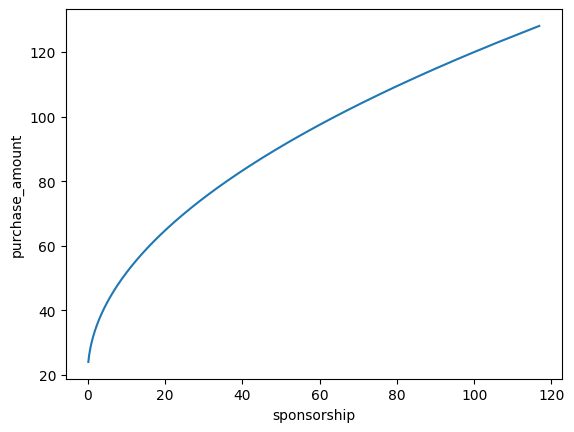

In [33]:
plt.plot(sponsorship, 20 + 10*np.sqrt(sponsorship))
plt.ylabel("purchase_amount")
plt.xlabel("sponsorship");

In [34]:
debias_m = LGBMRegressor(max_depth=3)
denoise_m = LGBMRegressor(max_depth=3)

sponsorship_res =  sponsorship.ravel() - cross_val_predict(debias_m, np.ones(sponsorship.shape), sponsorship.ravel(), cv=5)
amount_res =  purchase_amount.ravel() - cross_val_predict(denoise_m, np.ones(purchase_amount.shape), purchase_amount.ravel(), cv=5)

# final, non parametric causal model
non_param = LGBMRegressor(max_depth=3)
w = sponsorship_res ** 2
y_star = amount_res / sponsorship_res

non_param.fit(X=sponsorship_res.reshape(-1,1), y=y_star.ravel(), sample_weight=w.ravel());

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 4000, number of used features: 0
[LightGBM] [Info] Start training from score 23.675958
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the s

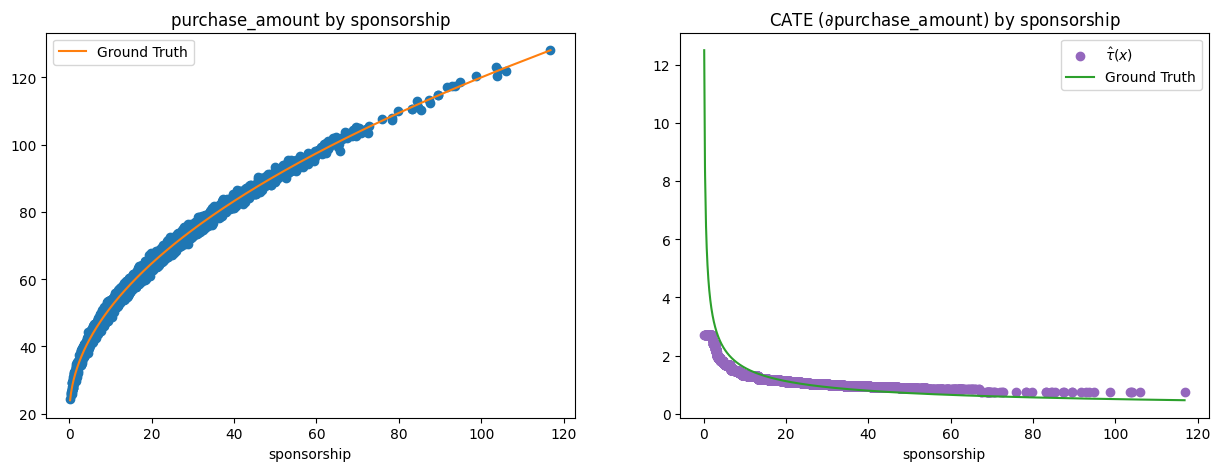

In [35]:
cate = non_param.predict(X=sponsorship)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.scatter(sponsorship, purchase_amount)
plt.plot(sponsorship, 20 + 10*np.sqrt(sponsorship), label="Ground Truth", c="C1")
plt.title("purchase_amount by sponsorship")
plt.xlabel("sponsorship")
plt.legend()

plt.subplot(1,2,2)
plt.scatter(sponsorship, cate, label="$\hat{\\tau}(x)$", c="C4")
plt.plot(sponsorship, 5/np.sqrt(sponsorship), label="Ground Truth", c="C2")
plt.title("CATE ($\partial$purchase_amount) by sponsorship")
plt.xlabel("sponsorship")
plt.legend();

1. Plot 1 displays a direct relationship between sponsorship and purchase amount, highlighting a simple model prediction (solid line) that approximates this relationship as the square root of sponsorship multiplied by a constant. The scatter plot of actual data shows variability around this model, illustrating how individual data points (representing different instances of sponsorship and resultant purchase amounts) distribute around the predicted values.
2. Plot 2 visualizes the estimated conditional average treatment effect (CATE) of sponsorship on purchase amount across different levels of sponsorship. The estimated CATE (scatter plot in color) reflects how additional sponsorship influences purchase amounts over varying sponsorship levels. The solid line represents the theoretical or ground truth effect, which in this case diminishes as sponsorship increases, highlighting a nonlinear treatment effect. The estimated CATE tries to capture this non-linear relationship, emphasizing the importance of understanding how effects vary across different sponsorship levels.

### Non-Scientific Double/Debiased ML

**Implement the cross prediction function.

In [53]:
from sklearn.model_selection import KFold

def cv_estimate(train_data, n_splits, model, model_params, X, y):
    cv = KFold(n_splits=n_splits)
    models = []
    cv_pred = pd.Series(np.nan, index=train_data.index)
    for train, test in cv.split(train_data):
        m = model(**model_params)
        m.fit(train_data[X].iloc[train], train_data[y].iloc[train])
        cv_pred.iloc[test] = m.predict(train_data[X].iloc[test])
        models.append(m)
    return cv_pred, models

Proceed with the orthogonalisation step.

In [54]:
y = "purchase_amount"
T = "campaign"
X = ["age", "gender", "income"]


In [55]:
y_hat, models_y = cv_estimate(train, 5, LGBMRegressor, {'max_depth': 3}, X, y)
t_hat, models_t = cv_estimate(train, 5, LGBMRegressor, {'max_depth': 3}, X, T)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000430 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 310
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 3
[LightGBM] [Info] Start training from score 1199.922398
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

In [56]:
y_res = train[y] - y_hat
t_res = train[T] - t_hat

Constrain the LGBM model to not increase it's predictions.

In [57]:
monotone_constraints = [0 if col != T else -1 for col in X + [T]]

model_final = LGBMRegressor(max_depth=3, monotone_constraints=monotone_constraints)
model_final.fit(train[X].assign(**{T: t_res}), y_res)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000557 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 565
[LightGBM] [Info] Number of data points in the train set: 10000, number of used features: 4
[LightGBM] [Info] Start training from score 0.066265
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

LGBMRegressor(max_depth=3, monotone_constraints=[0, 0, 0, -1])

Cross join the test set with a marketing campaign table.

In [58]:
pred_test = (test.rename(columns={"campaign": "factual_campaign"})
             .assign(jk=1)
             .reset_index()
             .merge(pd.DataFrame(dict(jk=1, campaign=np.linspace(0, 3000, 100))), on="jk")
             .drop(columns=["jk"]))

# Print to verify
print(pred_test[['index', 'campaign']].head())

   index    campaign
0      0    0.000000
1      0   30.303030
2      0   60.606061
3      0   90.909091
4      0  121.212121


Get the campaign residuals.

In [59]:
def ensamble_pred(df, models, X):
    return np.mean([m.predict(df[X]) for m in models], axis=0)

t_res_test = pred_test['campaign'] - ensamble_pred(pred_test, models_t, X)

pred_test[f"{y}_pred"] = model_final.predict(X=pred_test[X].assign(**{T: t_res_test}))

pred_test.query("index==0")

,index,age,gender,income,factual_campaign,purchase_amount,campaign_res,campaign,purchase_amount_pred
0,0,56,0,139952,2146.431386,1718.961406,2571.954972,0.000000,15.950805
1,0,56,0,139952,2146.431386,1718.961406,2571.954972,30.303030,15.950805
2,0,56,0,139952,2146.431386,1718.961406,2571.954972,60.606061,15.950805
3,0,56,0,139952,2146.431386,1718.961406,2571.954972,90.909091,15.950805
4,0,56,0,139952,2146.431386,1718.961406,2571.954972,121.212121,15.950805
...,...,...,...,...,...,...,...,...,...
95,0,56,0,139952,2146.431386,1718.961406,2571.954972,2878.787879,15.950805
96,0,56,0,139952,2146.431386,1718.961406,2571.954972,2909.090909,15.950805
97,0,56,0,139952,2146.431386,1718.961406,2571.954972,2939.393939,15.950805
98,0,56,0,139952,2146.431386,1718.961406,2571.954972,2969.696970,15.950805


In [60]:
y_hat_test = ensamble_pred(pred_test, models_y, X)
pred_test[f"{y}_pred"] = (y_hat_test +
                          model_final.predict(X=pred_test[X].assign(**{T: t_res_test})))

pred_test.query("index==0")

,index,age,gender,income,factual_campaign,purchase_amount,campaign_res,campaign,purchase_amount_pred
0,0,56,0,139952,2146.431386,1718.961406,2571.954972,0.000000,1297.283206
1,0,56,0,139952,2146.431386,1718.961406,2571.954972,30.303030,1297.283206
2,0,56,0,139952,2146.431386,1718.961406,2571.954972,60.606061,1297.283206
3,0,56,0,139952,2146.431386,1718.961406,2571.954972,90.909091,1297.283206
4,0,56,0,139952,2146.431386,1718.961406,2571.954972,121.212121,1297.283206
...,...,...,...,...,...,...,...,...,...
95,0,56,0,139952,2146.431386,1718.961406,2571.954972,2878.787879,1297.283206
96,0,56,0,139952,2146.431386,1718.961406,2571.954972,2909.090909,1297.283206
97,0,56,0,139952,2146.431386,1718.961406,2571.954972,2939.393939,1297.283206
98,0,56,0,139952,2146.431386,1718.961406,2571.954972,2969.696970,1297.283206


Plot the unit level sales curve.

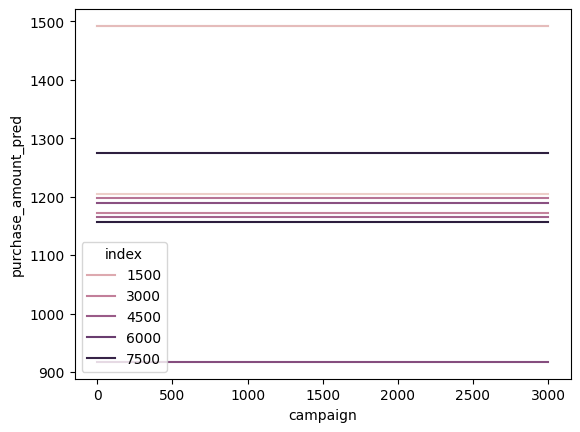

In [61]:
np.random.seed(1)
sample_ids = np.random.choice(pred_test["index"].unique(), 10)

sns.lineplot(data=pred_test.query("index in @sample_ids"),
             x="campaign", y="purchase_amount_pred", hue="index");

Make all the curves start from the same point.

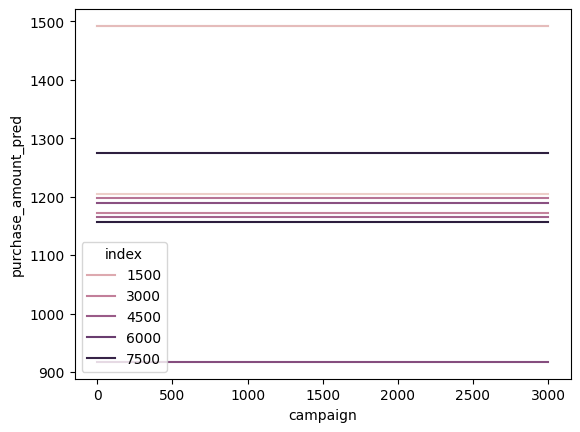

In [62]:
np.random.seed(1)
sample_ids = np.random.choice(pred_test["index"].unique(), 10)

sns.lineplot(data=(pred_test
                   .query("index in @sample_ids")
                   .assign(max_amount = lambda d: d.groupby("index")[["purchase_amount_pred"]].transform("max"))
                   .assign(amount_pred = lambda d: d["purchase_amount_pred"] - d["max_amount"] + d["purchase_amount_pred"].mean())),
             x="campaign", y="purchase_amount_pred", hue="index");

Choose boosted trees.

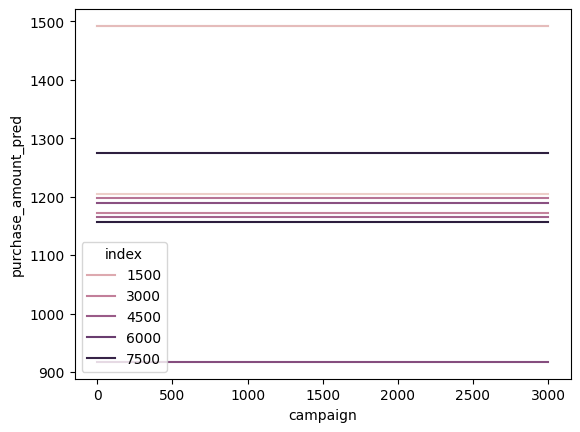

In [63]:
pred_test = (test
             .rename(columns={"campaign":"factual_campaign"})
             .assign(jk = 1)
             .reset_index()
             .merge(pd.DataFrame(dict(jk=1, campaign=np.linspace(0, 3000, 300))), on="jk")
             .drop(columns=["jk"]))

t_res_test = pred_test[T] - ensamble_pred(pred_test, models_t, X)

y_hat_test = ensamble_pred(pred_test, models_y, X)
pred_test[f"{y}_pred"] = model_final.predict(X=pred_test[X].assign(**{T: t_res_test})) + y_hat_test

np.random.seed(1)
sample_ids = np.random.choice(pred_test["index"].unique(), 10)

sns.lineplot(data=(pred_test
                   .query("index in @sample_ids")
                   .assign(max_amount = lambda d: d.groupby("index")[["purchase_amount_pred"]].transform("max"))
                   .assign(amount_pred = lambda d: d["purchase_amount_pred"] - d["max_amount"] + d["purchase_amount_pred"].mean())),
             x="campaign", y="purchase_amount_pred", hue="index");